# Feature Selection & Visualization Sonar Dataset


In [40]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import seaborn as sns
import pandas as pd
df = pd.read_csv('sonar.csv', header=None)
x = df.sample(frac=1, replace=True, random_state=1)
y = x[60]
x.drop([60],axis=1, inplace=True)
x.head()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
37,0.0333,0.0221,0.0270,0.0481,0.0679,0.0981,0.0843,0.1172,0.0759,0.0920,...,0.0036,0.0022,0.0032,0.0060,0.0054,0.0063,0.0143,0.0132,0.0051,0.0041
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0140,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0208,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157


Text(0.5, 1.0, 'Density Plot for the Unscaled Features in Dataset')

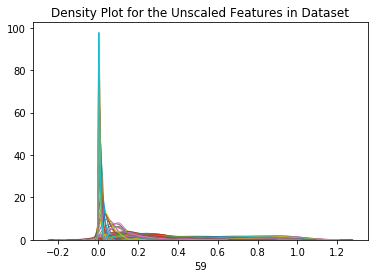

In [6]:
# Iterate through the features
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    
plt.title('Density Plot for the Unscaled Features in Dataset')

In [7]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)
print("x shape: ",x.shape)


x shape:  (208, 60)


Text(0.5, 1.0, 'Density Plot for Sonar scaled Features in Dataset')

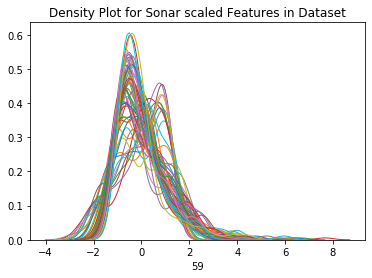

In [8]:
# Iterate through the features
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    
plt.title('Density Plot for Sonar scaled Features in Dataset')

Number of 0:  99
Number of 1 :  109


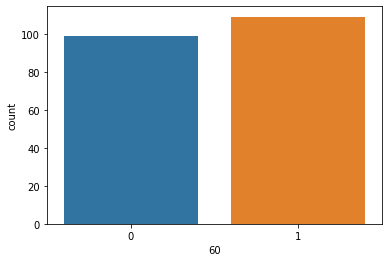

In [9]:
ax = sns.countplot(y,label="Count") 
o, z = y.value_counts()
print('Number of 0: ',z)
print('Number of 1 : ',o)

Plot some sample images along with their labels.

In [10]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,208.000000
mean,1.259676e-16,-1.708035e-17,-2.860959e-16,6.565261e-17,4.270089e-18,3.416071e-17,2.540703e-16,2.135044e-16,1.964241e-16,2.562053e-17,...,1.024821e-16,-1.665335e-16,1.024821e-16,-2.348549e-16,3.736327e-17,-1.110223e-16,1.878839e-16,-1.195625e-16,-1.216975e-16,0.000000
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413
min,-1.183116e+00,-1.156214e+00,-1.118120e+00,-9.949667e-01,-1.199456e+00,-1.601829e+00,-1.807042e+00,-1.484890e+00,-1.370317e+00,-1.327406e+00,...,-1.185540e+00,-1.354626e+00,-1.334996e+00,-1.348450e+00,-1.320799e+00,-1.442634e+00,-1.251480e+00,-1.262764e+00,-1.143603e+00,-1.024552
25%,-7.056588e-01,-7.471336e-01,-6.991299e-01,-6.428621e-01,-6.778783e-01,-7.133108e-01,-5.869469e-01,-6.372200e-01,-6.614144e-01,-7.114643e-01,...,-6.996136e-01,-6.988984e-01,-7.836352e-01,-7.532933e-01,-7.756190e-01,-6.946015e-01,-7.420027e-01,-7.472279e-01,-6.223295e-01,-0.653959
50%,-3.043475e-01,-2.445492e-01,-2.737717e-01,-2.928166e-01,-1.904398e-01,-1.885136e-01,-2.874616e-01,-2.591733e-01,-2.403004e-01,-2.032221e-01,...,-2.022988e-01,-2.128888e-01,-2.184901e-01,-2.507163e-01,-2.526913e-01,-2.137235e-01,-3.555025e-01,-2.490204e-01,-2.850347e-01,-0.291423
75%,4.355059e-01,4.713415e-01,3.935567e-01,3.022607e-01,3.311383e-01,3.826146e-01,4.349952e-01,4.352820e-01,4.334413e-01,3.691357e-01,...,3.405716e-01,3.425507e-01,5.120633e-01,4.370208e-01,4.742152e-01,5.298563e-01,5.404752e-01,5.741050e-01,1.902443e-01,0.252381
max,4.398198e+00,5.660819e+00,6.635115e+00,7.665570e+00,6.261955e+00,3.514510e+00,3.431078e+00,3.839464e+00,4.119611e+00,3.617419e+00,...,6.323535e+00,5.855802e+00,3.834014e+00,3.174743e+00,4.168087e+00,4.292281e+00,4.247363e+00,5.218265e+00,4.406429e+00,5.952253


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

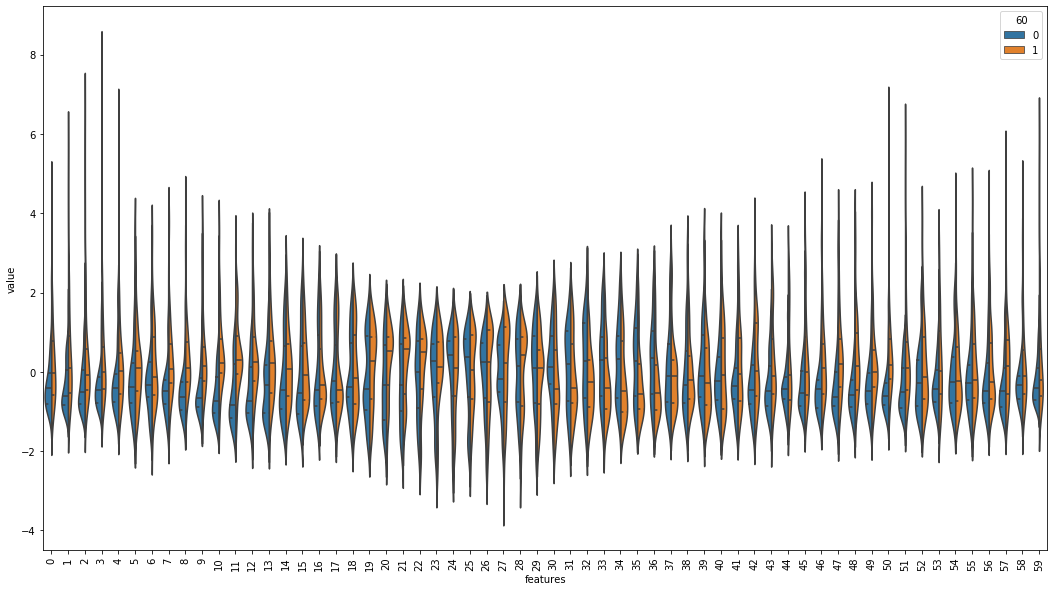

In [11]:
# Violin plot
data_dia = y
data_n_2 = x
#data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:61]],axis=1) # 

data = pd.melt(data,id_vars=[60],
                    var_name="features",
                    value_name='value')
#data
plt.figure(figsize=(18,10))
sns.violinplot(x="features", y="value", hue=60, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Now we have processed the data, let's start building our multi-layer perceptron using tensorflow. We will begin by importing the required libraries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

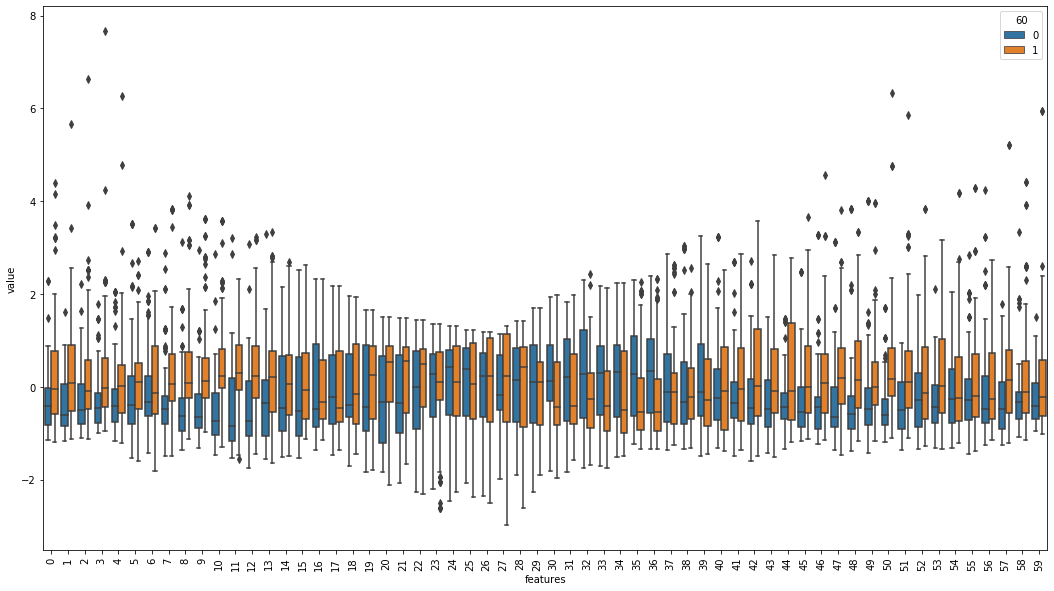

In [13]:
# As an alternative of violin plot, box plot can be used
plt.figure(figsize=(18,10))
sns.boxplot(x="features", y="value", hue=60, data=data)
plt.xticks(rotation=90)

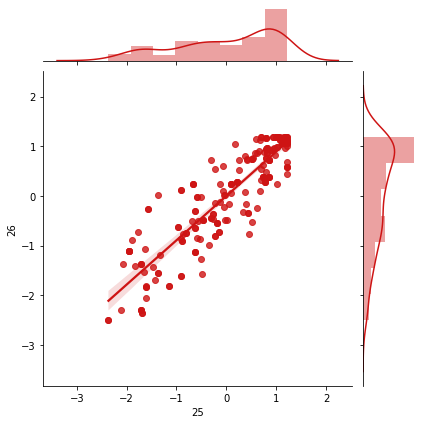

In [14]:
sns.jointplot(x.loc[:,25], x.loc[:,26], kind="regg", color="#ce1414")
# The #25 and #26 are somewhat linearly correlated 

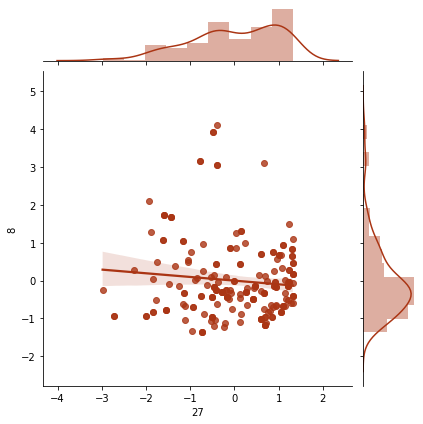

In [15]:
sns.jointplot(x.loc[:,27], x.loc[:,8], kind="regg", color="#aa3514")
# the dependency between 27 and 8 is not that obvious

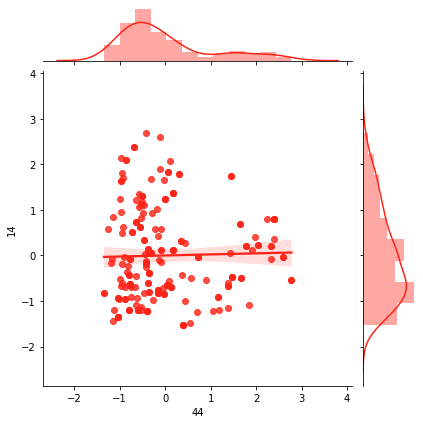

In [16]:
sns.jointplot(x.loc[:,44], x.loc[:,14], kind="regg", color="#ff2317")
# the 44 and 14 do not share covariance

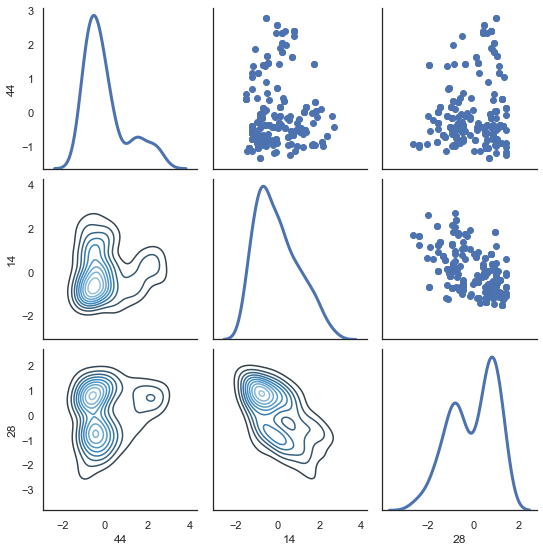

In [17]:
sns.set(style="white")
df = x.loc[:,[44,14,28]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

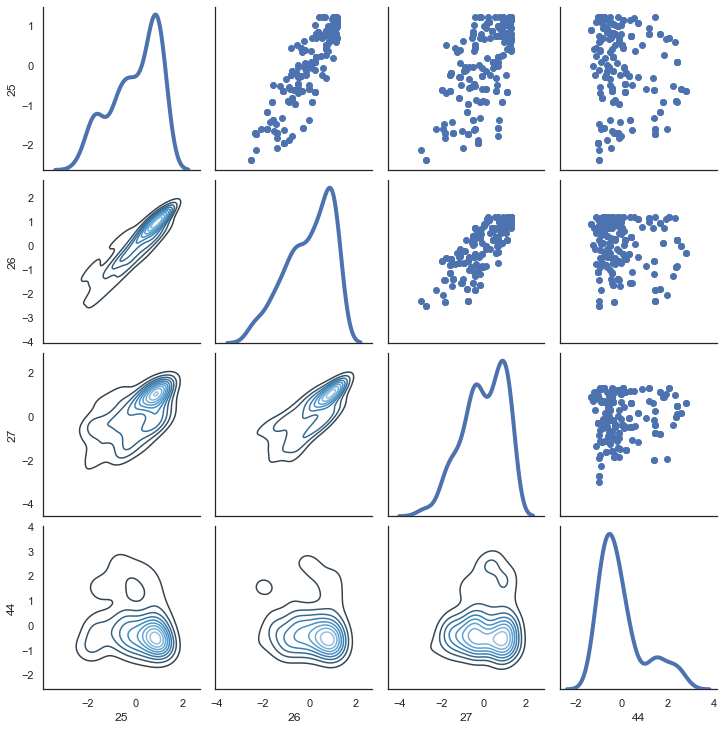

In [18]:
sns.set(style="white")
df = x.loc[:,[25,26,27,44]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

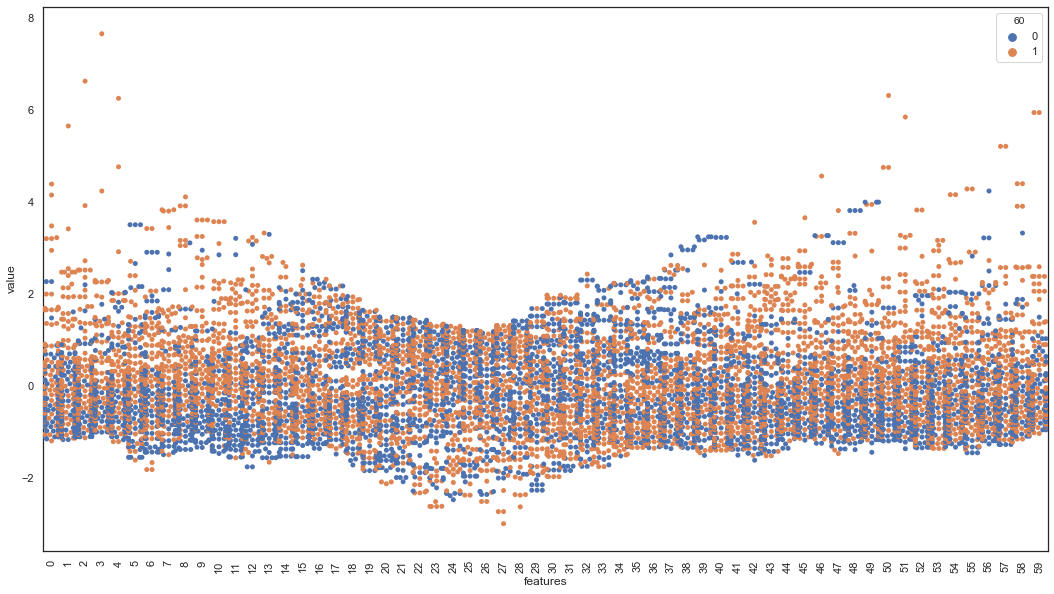

In [19]:

plt.figure(figsize=(18,10))
sns.swarmplot(x="features", y="value", hue=60, data=data)
plt.xticks(rotation=90)

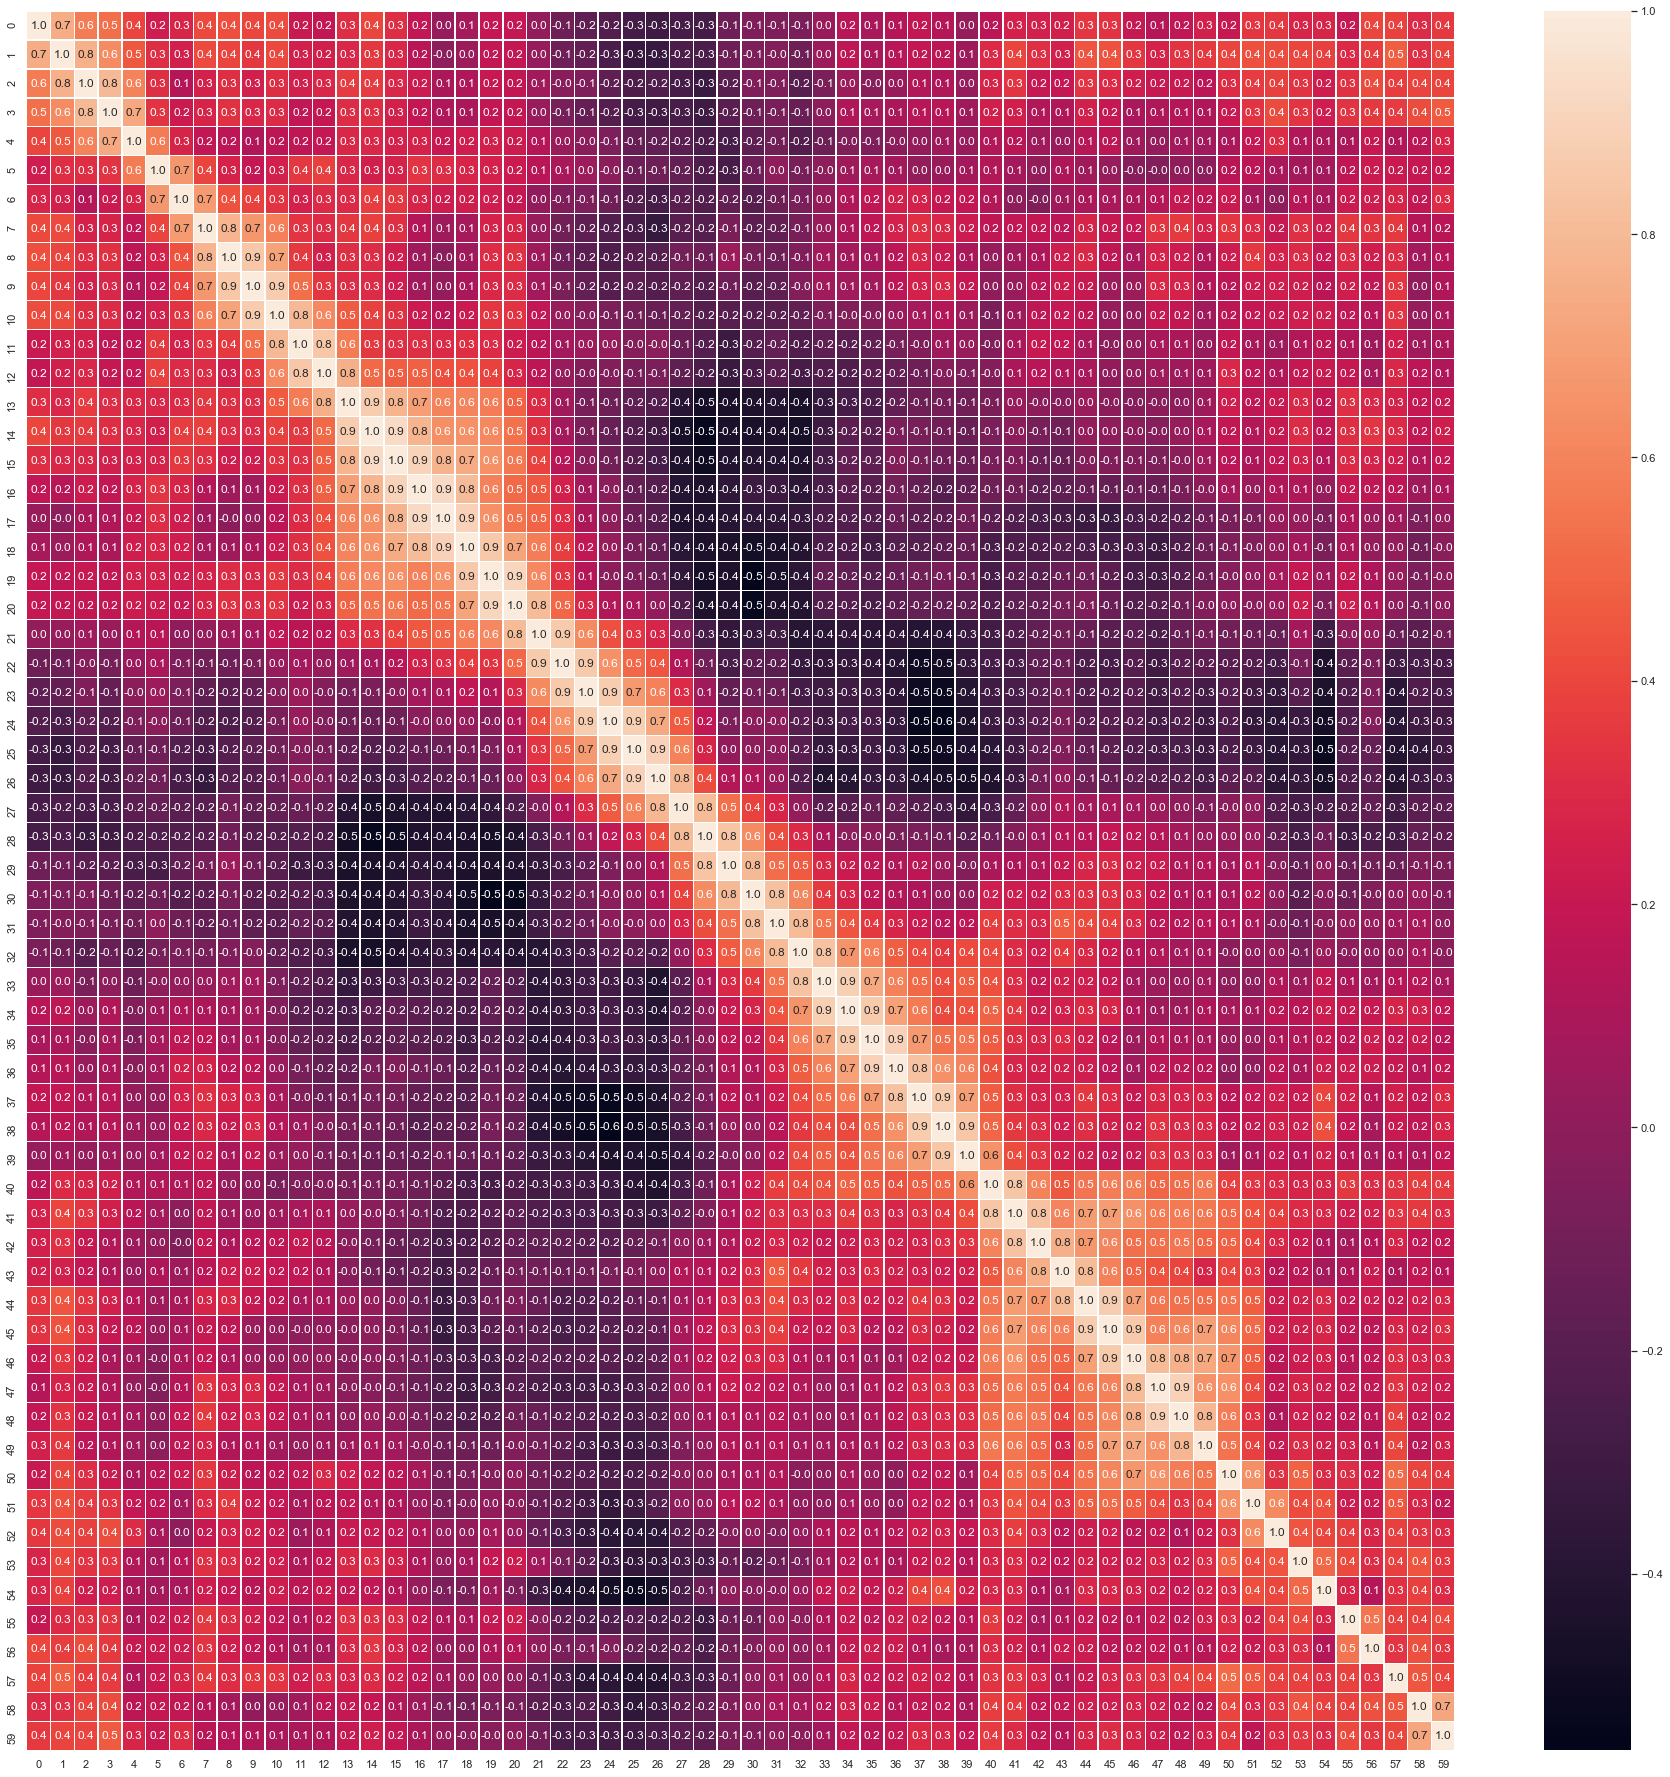

In [20]:
#correlation map
f,ax = plt.subplots(figsize=(32, 32))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


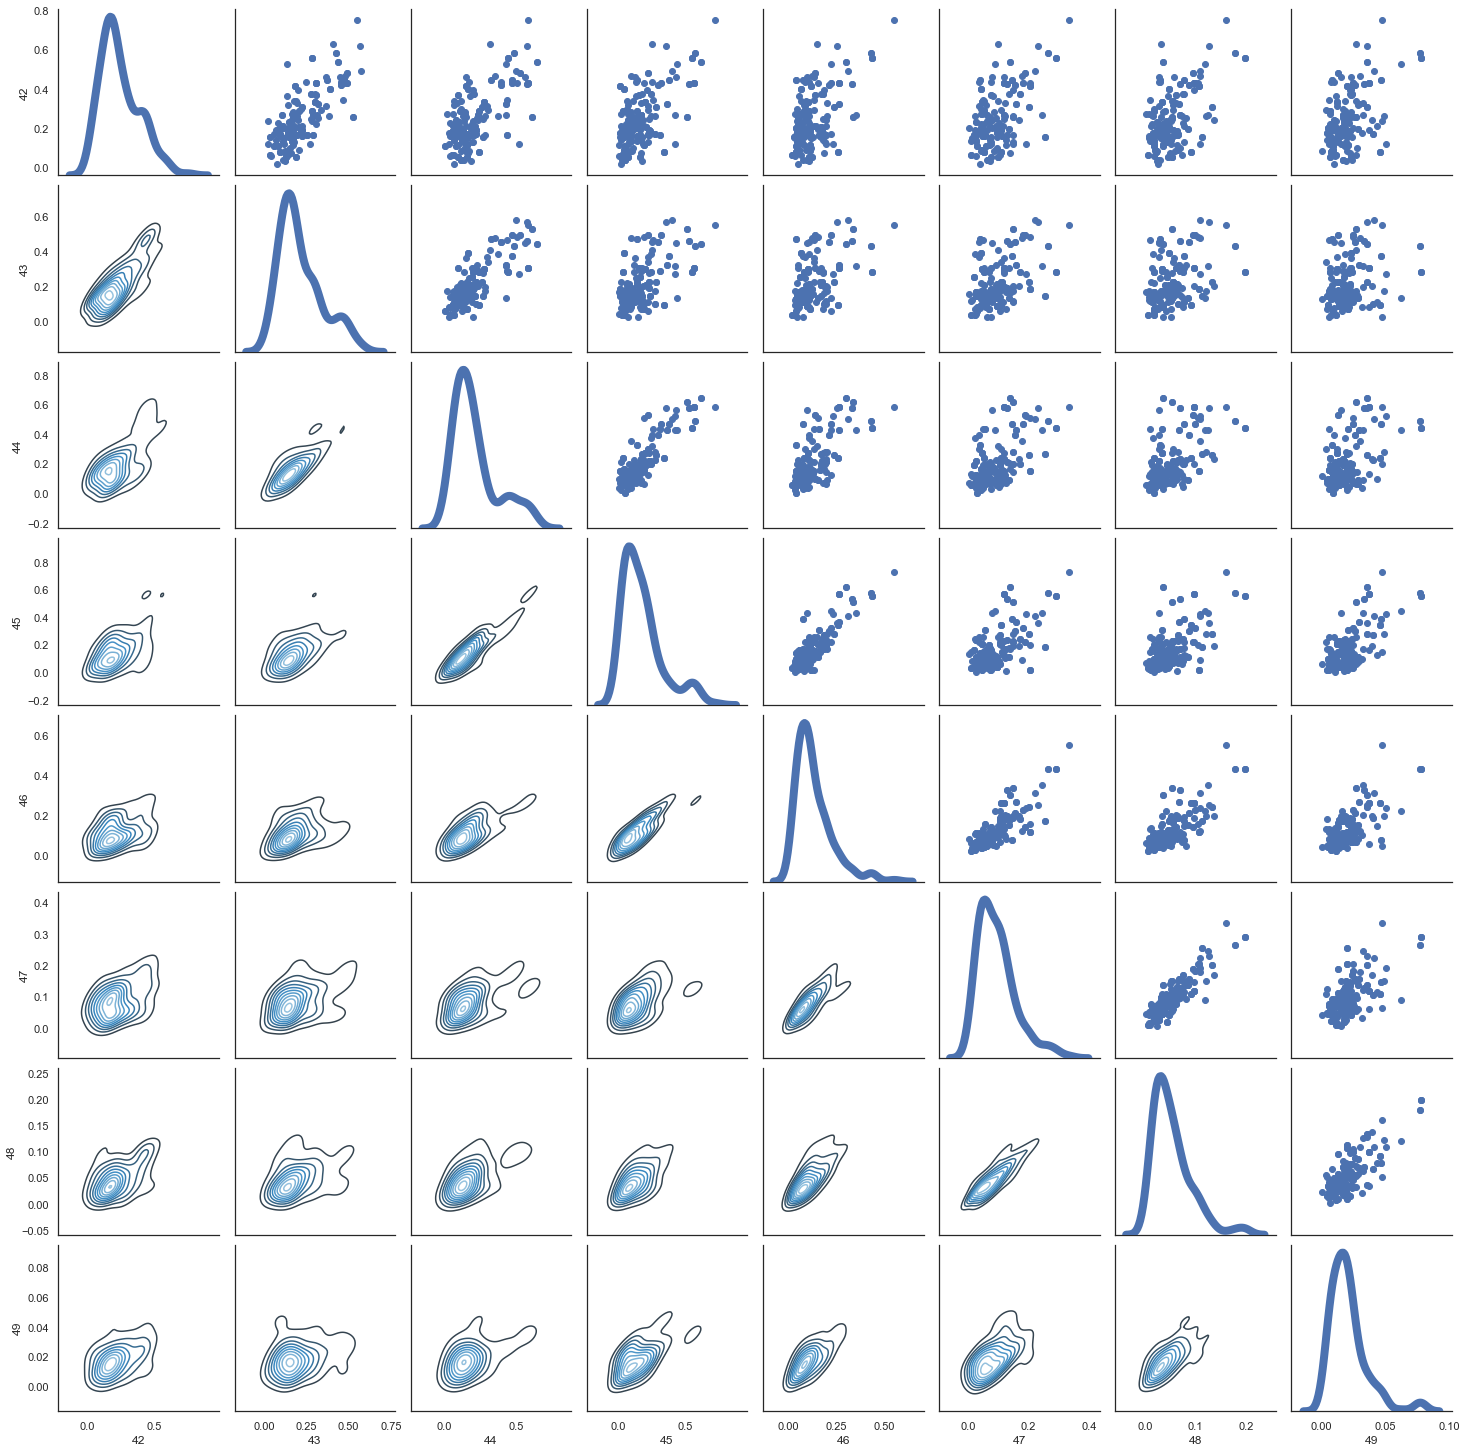

In [44]:
# There are areas of high correlations, most often with nearby measures: example from 42 to 49

sns.set(style="white")
df = x.loc[:,[42,43,44,45,46,47,48,49]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=8)
#  The features next to each other can explain each other 

## Visualizing High-Dimensional Data using PCA, t-SNE & UMAP

Explained variation per principal component: [0.32266603 0.222973   0.08650457 0.06250567]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 208 samples in 0.000s...
[t-SNE] Computed neighbors for 208 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 208 / 208
[t-SNE] Mean sigma: 0.725187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.765038
[t-SNE] KL divergence after 300 iterations: 0.516228


TypeError: 'int' object is not iterable

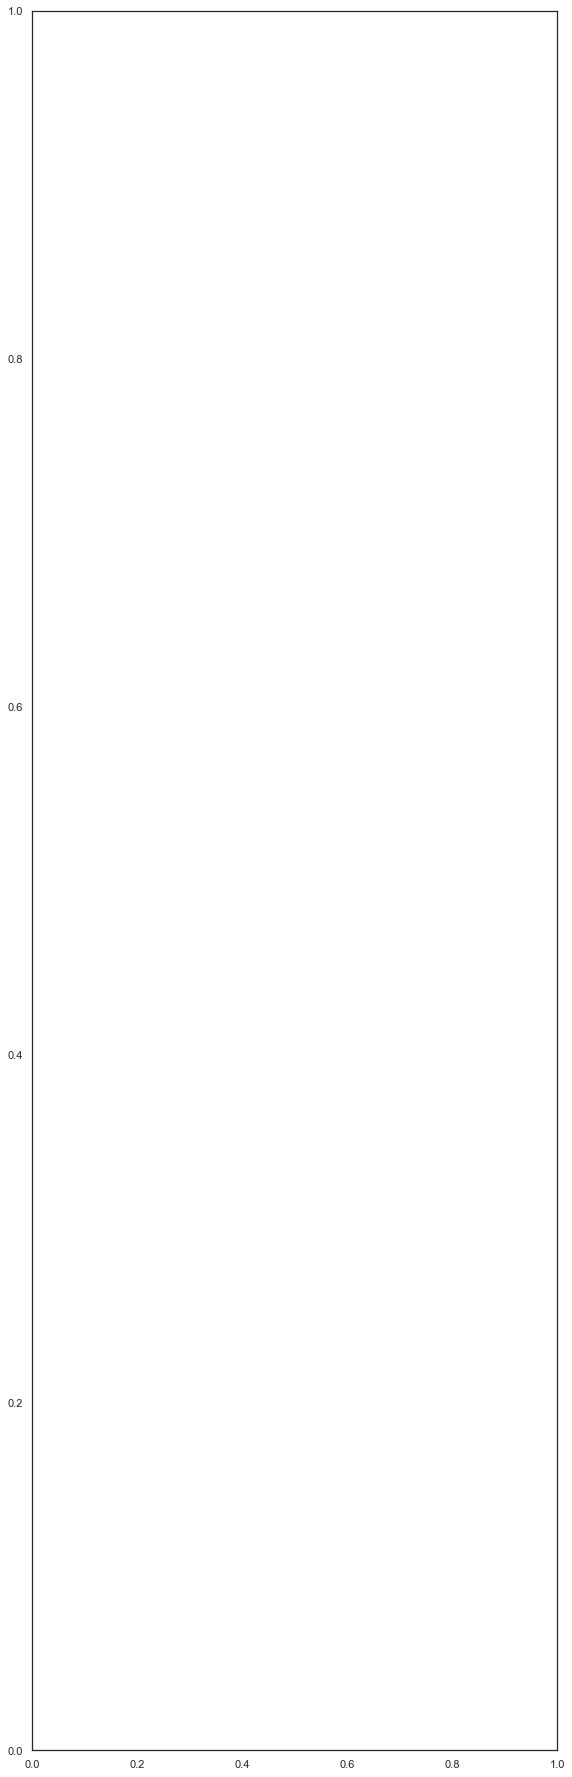

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
df = pd.read_csv('sonar.csv', header=None)
x = df.sample(frac=1, replace=True, random_state=1)
y = x[60]
x.drop([60],axis=1, inplace=True)
# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
umap_results = umap.UMAP().fit_transform(x)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(32,32))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

Feature Selection

In [47]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48), (256,256)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0

In [48]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.560 (+/-0.143) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.693 (+/-0.137) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.590 (+/-0.210) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.681 (+/-0.063) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.584 (+/-0.183) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.783 (+/-0.050) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.626 (+/-0.080) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.789 (+/-0.058) for {'activatio

In [49]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 256), 'learning_rate': 'constant', 'solver': 'adam'}


Confusion Matrix:
 [[20  0]
 [ 2 20]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.91      0.95        22

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42



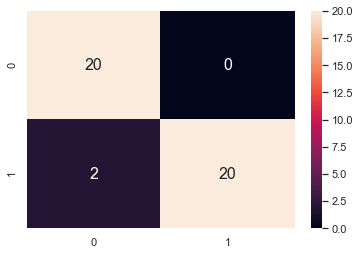

In [51]:
# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 16}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [52]:
#x.min
df = pd.read_csv('sonar.csv', header=None)
x = df.sample(frac=1, replace=True, random_state=1)
y = x[60]
x.drop([60],axis=1, inplace=True)
x.head()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
37,0.0333,0.0221,0.0270,0.0481,0.0679,0.0981,0.0843,0.1172,0.0759,0.0920,...,0.0036,0.0022,0.0032,0.0060,0.0054,0.0063,0.0143,0.0132,0.0051,0.0041
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0140,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0208,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157


F-Test Feature Scores List: 
 [2.68293590e-01 4.18343260e-01 2.51152400e-01 3.01608031e-01
 9.39328196e-02 2.12105468e-02 3.36210099e-02 2.76285991e-01
 6.14817777e-01 6.48374116e-01 1.00000000e+00 6.94353994e-01
 5.06118605e-01 2.55755089e-01 7.10221839e-02 3.31286118e-02
 4.12631525e-03 2.06902936e-04 9.48396295e-03 7.21613707e-02
 1.91696310e-01 1.65198467e-01 4.37016171e-02 6.55528797e-03
 1.39528163e-03 1.56121596e-03 3.46494464e-03 1.61463371e-02
 1.40642922e-03 6.41873797e-03 5.53151937e-02 3.34534106e-02
 1.34449647e-01 1.82510946e-01 1.33552412e-01 1.84049387e-01
 1.91639028e-01 1.74195289e-02 2.60496344e-03 6.99640907e-02
 3.04668664e-03 9.49964927e-02 2.03280792e-01 2.77170075e-01
 3.47523525e-01 2.73823569e-01 2.68751923e-01 3.27052276e-01
 3.27261768e-01 1.33143682e-01 6.22076306e-01 3.82153619e-01
 6.73972747e-02 2.91448893e-01 1.79166168e-02 5.65136469e-02
 2.44637515e-02 2.48570098e-01 1.48675808e-01 1.73202500e-01]
Feature List: 
 Int64Index([ 0,  1,  2,  3,  4,  5,  6

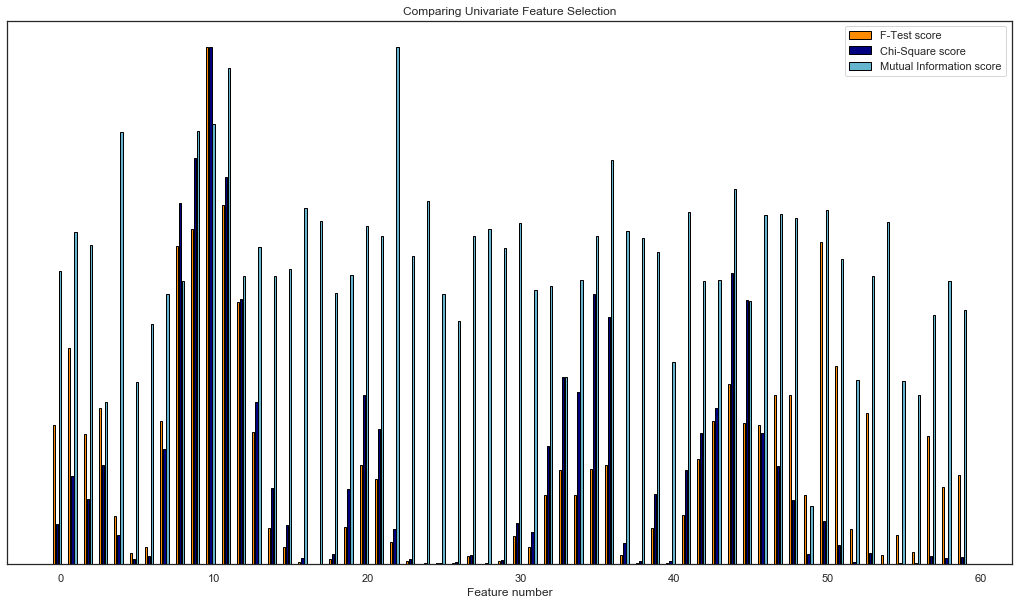

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


# ---------------------------------------------------------------------------
# We should be selecting features using TRAINING Dataset and NOT FULL Dataset - Fix This
# ---------------------------------------------------------------------------

# Get ready to plot scores from Univariate Feature Selection Methods
plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(x.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(x, y)
#scores = x_new_f.pvalues_
#scores = -np.log10(x_new_f.pvalues_)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Chi-Square Test
x_new_chi2 = SelectKBest(chi2, k=6)
x_new_chi2.fit_transform(x, y)
#scores = x_new_chi2.pvalues_
#scores = -np.log10(x_new_chi2.pvalues_)
scores = x_new_chi2.scores_
scores /= scores.max()
plt.bar(x_indices - .25, scores, width=.15,
        label='Chi-Square score', color='navy',
        edgecolor='black')

# Print Selected Features
print('Chi-Square Test Feature Scores List: \n', x_new_chi2.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(x, y)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', x.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=6).fit_transform(x, y)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(x, y)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(x, y)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[14  6]
 [ 1 21]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.78      0.95      0.86        22

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



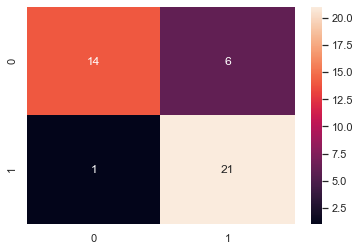

In [56]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_f, y, test_size=0.20, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))